# **1. Introduction**
Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States. Heart disease cost the United States about $239.9 billion each year from 2018 to 2019. This includes the cost of healthcare services, medicines, and lost productivity due to death (from CDC, Centers for Disease Control and Prevention, https://www.cdc.gov/heartdisease/facts.htm).

By analyzing factors that may be associated with heart disease, and how they interact with each other, we can possibly help people/doctors, healthcare providers, government, etc. prevent and/or decrease the number of positive diagnoses of heart disease.


# **2) Questions and Hypotheses**

**Questions:**
*   Is there any correlation between these factors?
*   From these three factors, which one is the one that presents higher correlation with heart disease diagnosis?
*   Do patients with heart disease have higher cholesterol than patients without heart disease?
*   Do patients with heart disease are older than patients without heart disease?
*   Do patients with heart disease have higher max. heart rate than patients without heart disease?

**Hypotheses:**
*   There is a strong correlation between max heart rate and heart disease diagnosis.
*   There is a correlation between age and heart disease diagnosis.
*   H0: There is no significant difference between positive and negative heart disease diagnosis for these factors.

	  Ha: There is a significant difference between positive and negative heart disease diagnosis for these factors.















# **3) Data**

This data set comes from [Kaggle](https://www.kaggle.com/datasets/yaminh/heart-disease-dataset/data) and contains 297 entries, and 14 columns. There are no missing values.




In [ ]:
# Set up the environment:

%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import pearsonr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
import statsmodels.api as sm
import pylab

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Read the data:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/2.12.1 Write a research proposal/Data sets/heart_data.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    int64  
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    int64  
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    int64  
 7   gender           297 non-null    int64  
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


We will focus on the following variables: **age, cholesterol, gender, and chest pain.**

In [ ]:
variables = [ 'age','cholesterol','max_hr', 'gender','diagnosis']
heart = df[variables]


heart.info()
heart.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          297 non-null    int64
 1   cholesterol  297 non-null    int64
 2   max_hr       297 non-null    int64
 3   gender       297 non-null    int64
 4   diagnosis    297 non-null    int64
dtypes: int64(5)
memory usage: 11.7 KB


,age,cholesterol,max_hr,gender,diagnosis
0,67,223,142,0,0
1,50,219,158,0,0
2,35,282,156,1,1
3,63,407,154,0,1
4,46,311,120,1,1


# **4) Methods**

For this analysis, I will create two DataFrames: one associated with positive diagnosis, and one associated with negative diagnosis.

I will determine if their distributions resemble a normal one by analyzing their histogram, skewness, and kurtosis. We can also determine normality by applying the Shapiro-Wilk test (if conditions are met).

If these distributions appear to be represented by a normal distribution, we can perform a t-test. If they are not, we will need to use a non-parametric test.

In [ ]:
# Separate the data set into positive/negative diagnosis.
pos_diag = heart[heart['diagnosis'] == 1]
#pos_diag.info()

pos_diag.head()


,age,cholesterol,max_hr,gender,diagnosis
2,35,282,156,1,1
3,63,407,154,0,1
4,46,311,120,1,1
8,59,239,142,1,1
10,44,197,177,1,1


In [ ]:
# Separate the data set into positive/negative diagnosis.
neg_diag = heart[heart['diagnosis'] == 0]
#neg_diag.info()
neg_diag.head()

,age,cholesterol,max_hr,gender,diagnosis
0,67,223,142,0,0
1,50,219,158,0,0
5,57,201,126,1,0
6,49,266,171,1,0
7,52,196,169,0,0


# Is there any correlation between factors?


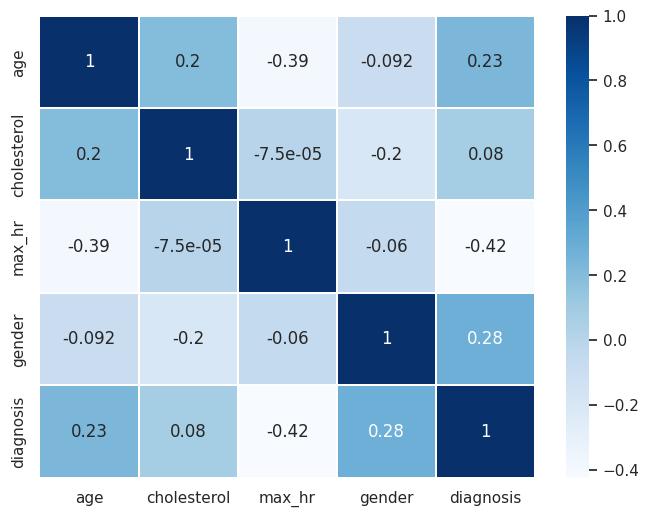

In [ ]:
# Calculate the correlation between numerical variables
corr_data = heart.corr()

# Create a heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='Blues', linewidths=0.1)
plt.show()


From the correlation table we can see:

*   max_hr and diagnosis present the highest correlation (0.42). Followed by age and max_hr (0.39).
*   max_hr and cholesterol present the lowest correlation (-7.5e-5).
*   There is some correlation between age and diagnosis, gender and cholesterol, and age and cholesterol.



In [ ]:
# Let's use the Pearson’s correlation coefficient test:
# The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.
# This function also performs a test of the null hypothesis that the distributions underlying the samples are uncorrelated and normally distributed.
# The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.

print(stats.pearsonr(heart['diagnosis'],heart['max_hr'], alternative='two-sided'))
print(stats.pearsonr(heart['diagnosis'],heart['age'], alternative='two-sided'))
print(stats.pearsonr(heart['diagnosis'],heart['gender'], alternative='two-sided'))
print(stats.pearsonr(heart['diagnosis'],heart['cholesterol'], alternative='two-sided'))

PearsonRResult(statistic=-0.4238170641833711, pvalue=2.2397153233937345e-14)
PearsonRResult(statistic=0.22707515465323655, pvalue=7.862867945608163e-05)
PearsonRResult(statistic=0.2784666966537961, pvalue=1.085075745016708e-06)
PearsonRResult(statistic=0.0802847509800023, pvalue=0.16758776714742332)


Based on these results:


*   For the variables chest pain, age, and gender, we can reject the null hypothesis that the distributions of these samples are uncorrelated.
*   For the variable cholesterol, we can't reject the null hypothesis.



# Do patients with heart disease have higher cholesterol than patients without heart disease?

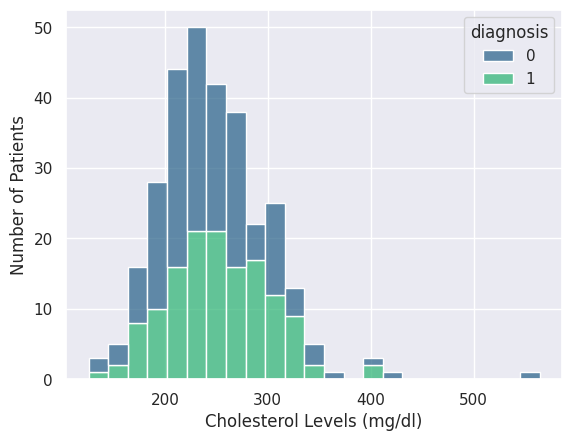

In [ ]:
# Let's plot diagnosis vs. cholesterol
# Plot histograms for the numerical variables: CHOLESTEROL

ax = sns.histplot(data=heart, x='cholesterol', hue='diagnosis', multiple='stack', palette='viridis')
ax.set(xlabel='Cholesterol Levels (mg/dl)', ylabel='Number of Patients')
plt.show()

# Diagnosis:
# 0: no heart disease
# 1: presence of heart disease

In [ ]:
# Count records by cholesterol
print(heart[['cholesterol']].agg(['count'])) # every diagnosis
print(pos_diag[['cholesterol']].agg(['count'])) # positive diagnosis
print(neg_diag[['cholesterol']].agg(['count'])) # negative diagnosis

       cholesterol
count          297
       cholesterol
count          137
       cholesterol
count          160


In [ ]:
# Descriptive statistics
print(stats.describe(pos_diag['cholesterol'])) # only positive cases
print(stats.describe(neg_diag['cholesterol'])) # only negative cases

DescribeResult(nobs=137, minmax=(131, 409), mean=251.85401459854015, variance=2468.0961786174325, skewness=0.28021747456753504, kurtosis=0.26825502143325597)
DescribeResult(nobs=160, minmax=(126, 564), mean=243.49375, variance=2889.874174528302, skewness=1.7193522375010004, kurtosis=7.343507885882611)


In [ ]:
# Based on visual inspection, the distributions seem to be normal, but there are some values skewing the data set.
count = len([i for i in heart['cholesterol'] if i >= 400])

# printing the intersection
print("The cholesterol levels greater than 400 are: " + str(count))


The cholesterol levels greater than 400 are: 4


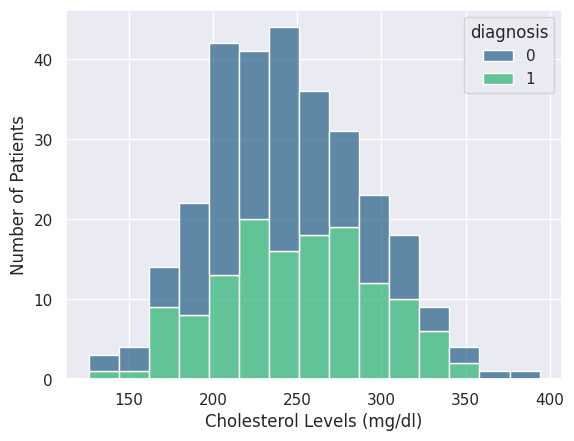

In [ ]:
# Since there are only 4 samples skewing the data, we can omit them and check the histogram again.
pos_diag_filt_chol = pos_diag[pos_diag['cholesterol']< 400]
neg_diag_filt_chol = neg_diag[neg_diag['cholesterol']< 400]
heart_filt = heart[heart['cholesterol']<400]

ax = sns.histplot(data=heart_filt, x='cholesterol', hue='diagnosis', multiple='stack', palette='viridis')
ax.set(xlabel='Cholesterol Levels (mg/dl)', ylabel='Number of Patients')
plt.show()

# Diagnosis:
# 0: no heart disease
# 1: presence of heart disease

In [ ]:
# Let's check Descriptive statistics with the new data set
print(stats.describe(pos_diag_filt_chol['cholesterol'])) # only positive cases
print(stats.describe(neg_diag_filt_chol['cholesterol'])) # only negative cases

DescribeResult(nobs=135, minmax=(131, 353), mean=249.54074074074074, variance=2135.623327805417, skewness=-0.0737507186865411, kurtosis=-0.5596324405377189)
DescribeResult(nobs=158, minmax=(126, 394), mean=240.36708860759492, variance=2070.807062807385, skewness=0.4912044973621108, kurtosis=0.381112802192098)


Based on the histograms and the kurtosis and skewness values, this group can be described by a normal distribution.

In [ ]:
# Let's perform a t-test:
stats.ttest_ind(pos_diag_filt_chol['cholesterol'], neg_diag_filt_chol['cholesterol'])

TtestResult(statistic=1.7077592665607713, pvalue=0.0887475237612625, df=291.0)

**Based on these results, we fail to reject the null hipothesis that there is no significant difference between positive and negative heart disease diagnosis for this factor.**

In [ ]:
pos_diag_filt_chol['cholesterol'].head()



2     282
4     311
8     239
10    197
14    131
Name: cholesterol, dtype: int64

In [ ]:
# Create a box plot

#plt.boxplot(heart)

ax = heart.boxplot('cholesterol', by = 'diagnosis',notch=True, patch_artist=True, bootstrap=10000,figsize=(10, 6))
ax.set_xticklabels(['Negative', 'Positive'])

# Do patients with heart disease are older than patients without heart disease?

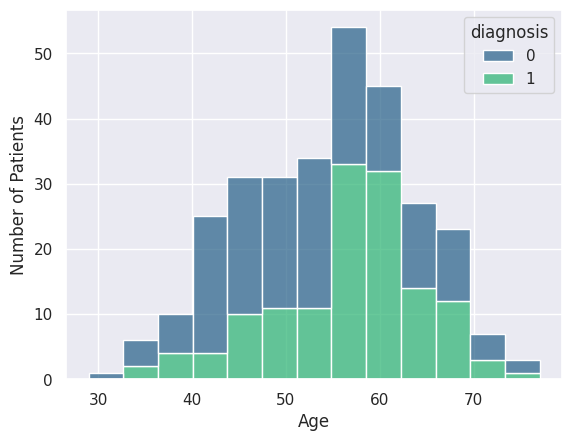

In [ ]:
# Plot histograms for the numerical variables: AGE

ax = sns.histplot(data=heart, x='age', hue='diagnosis', multiple='stack', palette='viridis')
ax.set(xlabel='Age', ylabel='Number of Patients')
plt.show()


# Diagnosis:
# 0: no heart disease
# 1: presence of heart disease

In [ ]:
# Count records by age
print(heart[['age']].agg(['count'])) # every diagnosis
print(pos_diag[['age']].agg(['count'])) # positive diagnosis
print(neg_diag[['age']].agg(['count'])) # negative diagnosis

       age
count  297
       age
count  137
       age
count  160


In [ ]:
# Descriptive statistics
print(stats.describe(pos_diag['age'])) # only positive cases
print(stats.describe(neg_diag['age'])) # only negative cases

DescribeResult(nobs=137, minmax=(35, 77), mean=56.75912408759124, variance=62.404787462430235, skewness=-0.5799736892985448, kurtosis=0.18157053571574666)
DescribeResult(nobs=160, minmax=(29, 76), mean=52.64375, variance=91.22448899371068, skewness=0.12027353093627505, kurtosis=-0.6358239244798729)


Based on the histograms and the kurtosis and skewness values, this group can be described by a normal distribution.

In [ ]:
# Let's perform a t-test:
stats.ttest_ind(pos_diag['age'], neg_diag['age'])

TtestResult(statistic=4.004759233496147, pvalue=7.862867945608019e-05, df=295.0)

We know that we can reject the null from either of these results:

1.   The test statistic is greater than 1.96.
2.   The p-value is less than 0.05.

**Based on these results, we can reject the null hipothesis that there is no significant difference between positive and negative heart disease diagnosis for this factor. In other words,we can in fact say that AGE is a good metric for determining or predicting whether or not someone has heart disease.**


In [ ]:
# Let's calculate the confidence intervals

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(pos_diag['age'], neg_diag['age']))


The difference in means at the 95% confidence interval (two-tail) is between -6.10036398235475 and -2.130384192827734.


<ipython-input-31-0ec6a77117d0>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['Negative ','Positive'])


[[Text(0, 0, 'Negative '), Text(1, 0, 'Positive')]]

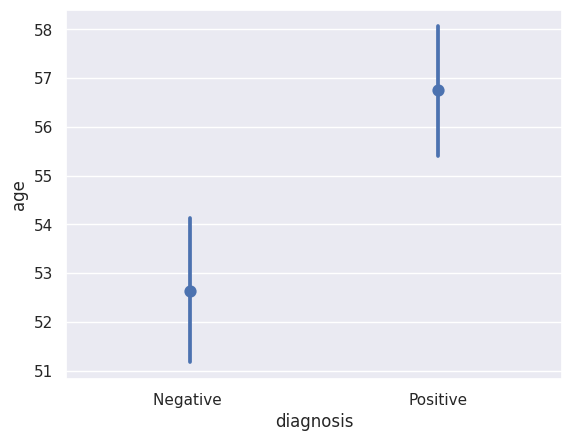

In [ ]:
g = sns.pointplot(data=heart, x= 'diagnosis', y = 'age', errorbar=('ci', 95),n_boot = 10000, linestyles='none')

g.set(xticklabels = ['Negative ','Positive'])

In [ ]:
# Create a box plot

#plt.boxplot(heart)

ax = heart.boxplot('age', by = 'diagnosis',notch=True, patch_artist=True, bootstrap=10000,figsize=(10, 6))
ax.set_xticklabels(['Negative', 'Positive'])



# Do patients with heart disease have higher max. heart rate than patients without heart disease?

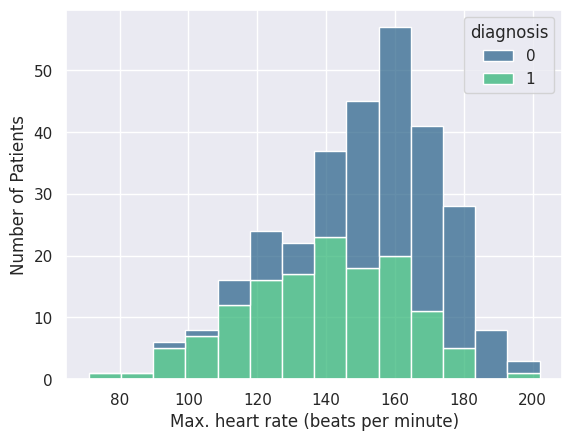

In [ ]:
# Plot histograms for the numerical variables: MAX HEART RATE

ax = sns.histplot(data=heart, x='max_hr', hue='diagnosis', multiple='stack', palette='viridis')
ax.set(xlabel='Max. heart rate (beats per minute)', ylabel='Number of Patients')
plt.show()

# Diagnosis:
# 0: no heart disease
# 1: presence of heart disease

In [ ]:
# Count records by max. hr
print(heart[['max_hr']].agg(['count'])) # every diagnosis
print(pos_diag[['max_hr']].agg(['count'])) # positive diagnosis
print(neg_diag[['max_hr']].agg(['count'])) # negative diagnosis

       max_hr
count     297
       max_hr
count     137
       max_hr
count     160


In [ ]:
# Descriptive statistics
print(stats.describe(pos_diag['max_hr'])) # only positive cases
print(stats.describe(neg_diag['max_hr'])) # only negative cases

DescribeResult(nobs=137, minmax=(71, 195), mean=139.1094890510949, variance=515.7746887075998, skewness=-0.2888916346381879, kurtosis=-0.2612795694312462)
DescribeResult(nobs=160, minmax=(96, 202), mean=158.58125, variance=362.64744496855343, skewness=-0.6854031425663942, kurtosis=0.45403916676667055)


Based on the histograms and kurtosis and skewness values, this group can be described by a normal distribution.

In [ ]:
# Let's perform a t-test:
stats.ttest_ind(pos_diag['max_hr'], neg_diag['max_hr'])

TtestResult(statistic=-8.036781366876342, pvalue=2.239715323393672e-14, df=295.0)


**Based on these results, we can reject the null hipothesis that there is no significant difference between positive and negative heart disease diagnosis for this factor.In other words,we can in fact say that MAX. HR is a good metric for determining or predicting whether or not someone has heart disease.**


In [ ]:
# Let's calculate the confidence intervals

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(pos_diag['max_hr'], neg_diag['max_hr']))


The difference in means at the 95% confidence interval (two-tail) is between 14.65824464598206 and 24.28527725182817.


<ipython-input-34-90384bb984ed>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['Negative ','Positive'])


[[Text(0, 0, 'Negative '), Text(1, 0, 'Positive')]]

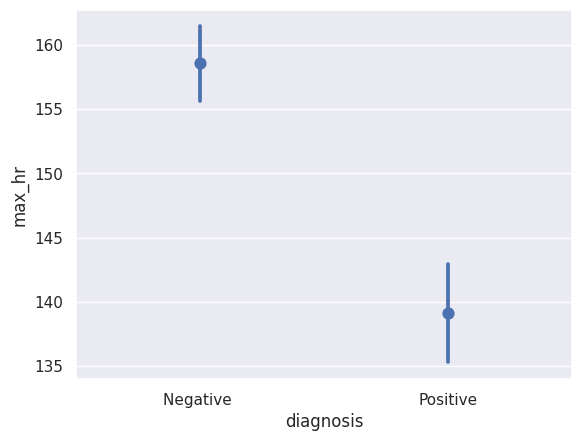

In [ ]:
g = sns.pointplot(data=heart, x= 'diagnosis', y = 'max_hr', errorbar=('ci', 95),n_boot = 10000, linestyles='none')

g.set(xticklabels = ['Negative ','Positive'])

In [ ]:
# Create a box plot

#plt.boxplot(heart)

ax = heart.boxplot('max_hr', by = 'diagnosis',notch=True, patch_artist=True, bootstrap=10000,figsize=(10, 6))
ax.set_xticklabels(['Negative', 'Positive'])

# **5) Results**

From our results, we can see that:
*   max_hr present the highest correlation with diagnosis(0.42). Followed by age with max_hr (0.39).
*   max_hr and cholesterol present the lowest correlation (-7.5e-5).
*   There is some correlation between age and diagnosis, gender and cholesterol, and age and cholesterol.


Based on visual inspection, max heart rate and age for both, positive and negative diagnosis, follow a normal distribution. For the cholesterol variable, at first, the kurtosis and skewness values were leading us to assume a not normal distribution, but via visual inspetion we could see that the distributions were very close to normal. We found that there were some outliers skewing the data set. After removing those (only 4 in the whole data set), we found that those distributions do indeed follow a normal distribution.

Regarding t-tests, we were able to reject the null hipothesis stating that there is no significant difference between positive and negative heart disease diagnosis for max heart rate and age. Then, we calculated the 95% confidence interval for each variable.
We were not able to reject the null hypothesis for the variable cholesterol.

# **6) Discussion and Recommendation**

With 95% confidence, we can say:
* Patients without heart disease are on average between 2.14 years and 6.10 years younger than patients with a positive heart disease diagnosis.

* Patients with heart disease present max. heart rate values that are on average between 14.66 bpm and 24.29 bpm higher than patients without a positive heart disease diagnosis.

Even though, the size of this data set was large enough to infer some conclusions, increasing it would provide a better understanding of the relationship between these factors and a positive/negative heart disease diagnosis. Also, adding another column stating ethnicity/race (since it is an important contributing factor), would also give researchers a better understanding.